In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


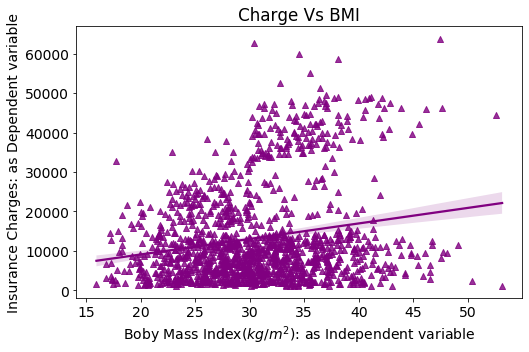

In [5]:
sns.regplot(x='bmi',y='charges',data=df,marker='^',color='purple')
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1, 'Missing value in the dataset')

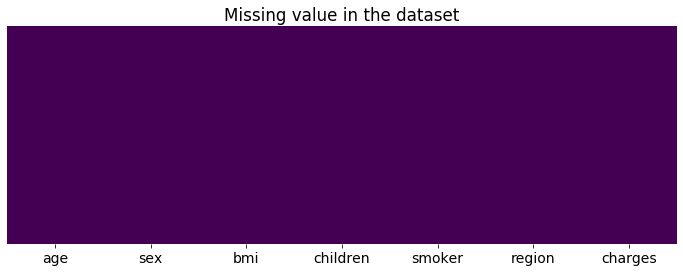

In [7]:
# check for missing values
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

In [8]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


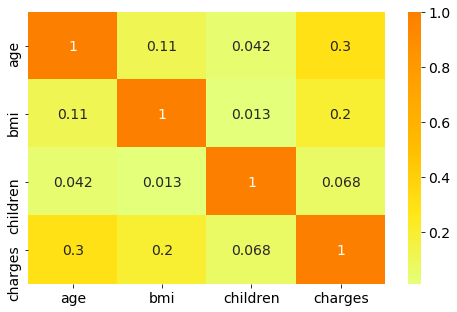

In [9]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

In [10]:
# above plot shows there is no correlation
# sex and smoker is not shown because they are binary (1 or 0, yes or no)

In [17]:
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

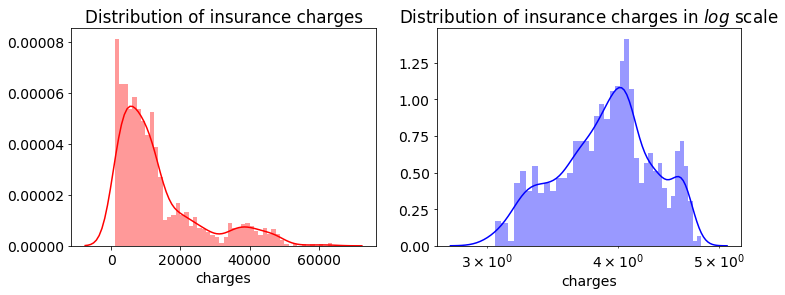

In [11]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ scale')
ax.set_xscale('log')

Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

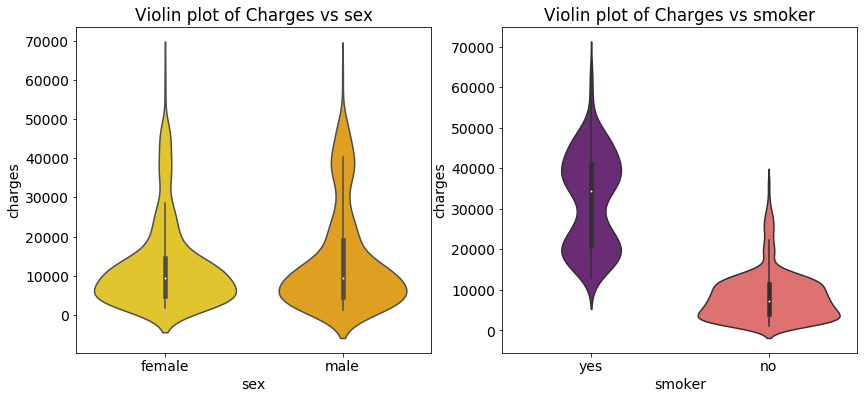

In [12]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

Text(0.5, 1.0, 'Violin plot of charges vs children')

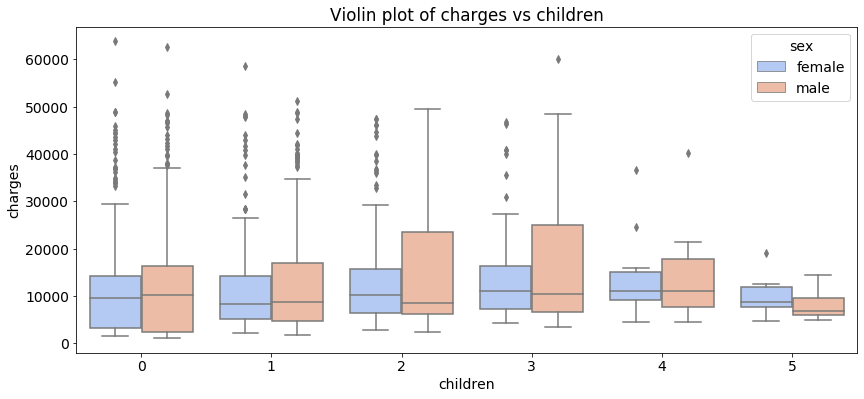

In [13]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='coolwarm')
plt.title('Violin plot of charges vs children')

In [14]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Text(0.5, 1.0, 'Violin plot of charges vs children')

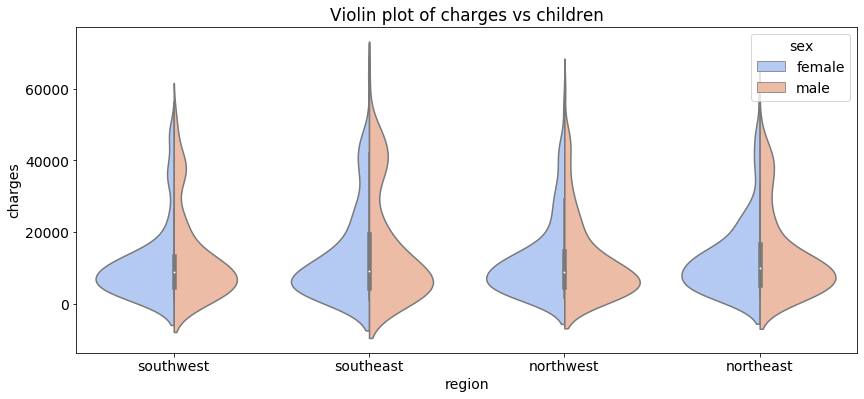

In [15]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='coolwarm',split=True)
plt.title('Violin plot of charges vs children')

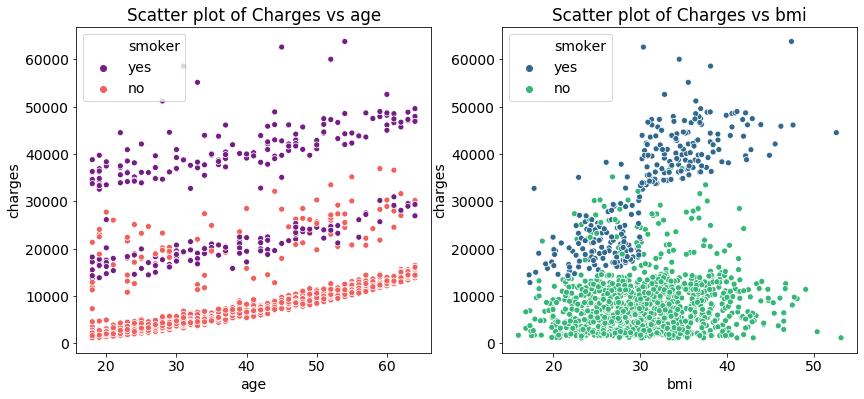

In [16]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

In [18]:
categorical_columns = ['sex', 'children', 'smoker', 'region']

In [19]:
df_encode = pd.get_dummies(data=df, prefix=None, prefix_sep='_', columns=categorical_columns, drop_first=True, 
                          dtype='int8')

In [20]:
df_encode

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [21]:
# in pd.get_dummies drop_first=True saves us from dummy variable trap, by eliminating 
# 1 dummy variable from categories. (if we got 6 categories, we will see 5 after drop_first=True)

In [22]:
# non-normal dependent variable'lari normalize etmek icin box cox transformation kullanmamiz lazim
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)
ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [23]:
## Log transform
# bunu niye yapti anlamadim (muhtemelen lambda 0 a cok yakin ciktigi icin direk lambda ile 
# islem yapmak yerine 0 aldi o da log y oluyor zaten)
df_encode['charges'] = np.log(df_encode['charges'])

In [24]:
# iki yeni daha independent variable ekledik bunlar age_sigara_icen ve age_male olan
df_encode['age_smoker_yes'] = df_encode['age']* df_encode['smoker_yes']
df_encode['age_sex_male'] = df_encode['age']* df_encode['sex_male']

In [25]:
# simdi elimizdeki datayi traning ve test olarak ayircaz
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [26]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

In [27]:
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [31]:
len(theta)

15

In [30]:
X_train_0.shape[1]

15

In [32]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]

In [33]:
parameter

['theta_0',
 'theta_1',
 'theta_2',
 'theta_3',
 'theta_4',
 'theta_5',
 'theta_6',
 'theta_7',
 'theta_8',
 'theta_9',
 'theta_10',
 'theta_11',
 'theta_12',
 'theta_13',
 'theta_14']

In [34]:
columns = ['intersect:x_0=1'] + list(X.columns.values)

In [35]:
columns

['intersect:x_0=1',
 'age',
 'bmi',
 'sex_male',
 'children_1',
 'children_2',
 'children_3',
 'children_4',
 'children_5',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'age_smoker_yes',
 'age_sex_male']

In [36]:
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [38]:
parameter_df

,Parameter,Columns,theta
0,theta_0,intersect:x_0=1,6.933947
1,theta_1,age,0.037384
2,theta_2,bmi,0.012043
3,theta_3,sex_male,-0.267692
4,theta_4,children_1,0.152573
5,theta_5,children_2,0.280255
6,theta_6,children_3,0.254635
7,theta_7,children_4,0.506222
8,theta_8,children_5,0.498391
9,theta_9,smoker_yes,2.784171


In [39]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,6.933947,6.933947
1,theta_1,age,0.037384,0.037384
2,theta_2,bmi,0.012043,0.012043
3,theta_3,sex_male,-0.267692,-0.267692
4,theta_4,children_1,0.152573,0.152573
5,theta_5,children_2,0.280255,0.280255
6,theta_6,children_3,0.254635,0.254635
7,theta_7,children_4,0.506222,0.506222
8,theta_8,children_5,0.498391,0.498391
9,theta_9,smoker_yes,2.784171,2.784171


In [40]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

In [43]:
y_pred_norm

array([ 9.39377665,  8.59808755, 10.4536474 ,  9.13267125,  8.33134526,
        9.00036764, 10.4369225 ,  8.49443531,  9.59109576, 10.67485826,
        8.02929576, 10.36469781,  8.1225195 ,  9.54638371,  8.77567914,
        8.47375015,  8.65463713,  7.94987489, 10.2714854 , 10.47770845,
       10.49886646,  9.15435382,  8.85673964,  9.24549356, 10.42273389,
        8.44019507,  8.51085808, 10.04803958,  7.9125567 ,  9.1169059 ,
        9.43949096,  8.10351846,  8.3269815 ,  9.51498715,  8.75548004,
       10.01687278,  9.44510869,  9.04384392,  9.3202727 ,  8.25207145,
        9.36065882, 10.57288063,  9.29215952, 10.44785246,  9.44291041,
        9.30859504,  8.44322712,  8.46246834,  9.08448942,  8.66277177,
        9.45095689,  8.85791998,  9.23421006,  8.1155663 ,  8.31607165,
        9.40780233,  9.37342127,  9.19666583,  8.84352171, 10.04219463,
       10.03889456,  8.39913021,  7.70956266,  8.39336324,  8.00291227,
        8.61386602,  7.93087774,  7.74400648,  8.38707043,  9.99

In [41]:
#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

In [42]:
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.15683180486788678
R square obtain for normal equation method is : 0.8154227058932506


In [44]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.15683180486793152
R square obtain for scikit learn library is : 0.8154227058931979
